<a href="https://colab.research.google.com/github/mazhar75/CodeCasa/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import and view the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.columns=df.columns.str.lower().str.replace(' ','_')

**Give a look of summery of the data**

In [4]:
df.describe()

,stock,open,high,low,close,holiday,unpredictability_score
count,73439.00000,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000
mean,51.00000,75.409436,75.422897,75.558007,75.494224,0.057504,4.495146
std,29.73234,32.826845,32.859680,32.848885,32.852738,0.232804,2.899212
min,0.00000,21.029600,21.134500,21.040100,20.970700,0.000000,0.000000
25%,25.00000,50.026400,50.018800,50.096400,50.075650,0.000000,2.000000
50%,51.00000,69.456200,69.420900,69.636100,69.503100,0.000000,4.000000
75%,77.00000,94.103650,94.074300,94.331150,94.181900,0.000000,7.000000
max,102.00000,233.849800,233.648900,231.707200,232.886900,1.000000,9.000000


In [5]:
df.head().T

,0,1,2,3,4
id,id_0,id_1,id_2,id_3,id_4
stock,0,0,0,0,0
date,03-01-2017,04-01-2017,05-01-2017,06-01-2017,09-01-2017
open,82.9961,83.1312,82.6622,83.0279,82.3761
high,82.7396,83.1669,82.7634,82.795,82.0828
low,82.9144,83.3779,82.8984,82.8425,82.1473
close,82.8101,82.969,82.8578,82.7385,81.8641
holiday,1,0,0,0,0
unpredictability_score,7,7,7,7,7


**Check Null values**

In [6]:
df.isnull().sum()

id                        0
stock                     0
date                      0
open                      0
high                      0
low                       0
close                     0
holiday                   0
unpredictability_score    0
dtype: int64

#EDA

In [ ]:
#!pip install --upgrade scipy



In [ ]:
#!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1

In [7]:
from ydata_profiling import ProfileReport

In [8]:
pr_df = ProfileReport(df)

In [9]:
df.dtypes

id                         object
stock                       int64
date                       object
open                      float64
high                      float64
low                       float64
close                     float64
holiday                     int64
unpredictability_score      int64
dtype: object

In [10]:
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='close', ylabel='Count'>

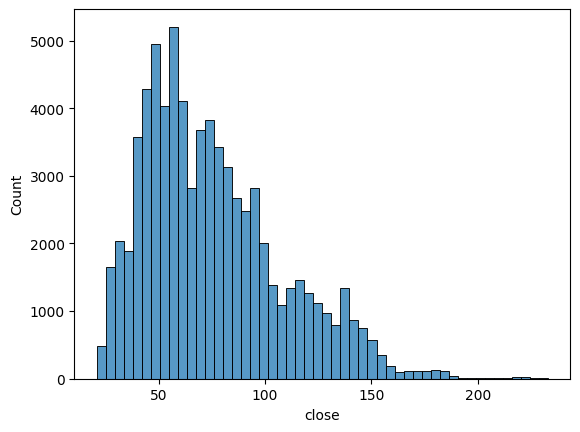

In [12]:
sns.histplot(df.close,bins=50)

<AxesSubplot:xlabel='close', ylabel='Count'>

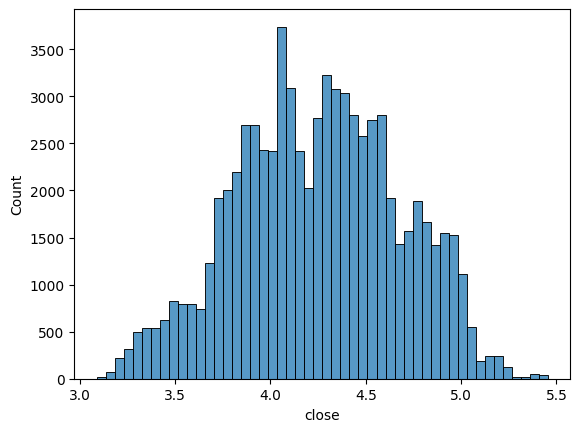

In [13]:

close_logs=np.log1p(df.close)
sns.histplot(close_logs,bins=50)

#Data Preparation


In [14]:
df['close'], df['unpredictability_score'] = df['unpredictability_score'].copy(), df['close'].copy()
df.rename(columns={'close': 'unpredictability_score', 'unpredictability_score': 'close'}, inplace=True)

In [15]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=11)

In [16]:
len(df_full_train),len(df_test)

(58751, 14688)

In [17]:
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=2)

In [18]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [42]:
base=['stock','open','high','low','unpredictability_score','holiday']

In [43]:
def prepare(X):
    x_val=X[base].fillna(0).values
    return x_val

In [44]:
X_train=prepare(df_train)
X_val=prepare(df_val)

In [45]:
y_train=np.log1p(df_train['close'].values)
y_val=np.log1p(df_val['close'].values)
y_test=np.log1p(df_test['close'].values)

In [46]:
def train_linear_regression(X,y):
  ones=np.ones(X.shape[0])
  X=np.column_stack([ones,X])
  XTX=X.T.dot(X)
  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv.dot(X.T).dot(y)
  return w_full[0],w_full[1:]

In [47]:
w0,w1=train_linear_regression(X_train,y_train)
w0,w1

(3.286359779258689,
 array([-9.51896146e-06, -7.10742445e-03, -7.38859242e-03,  2.67899033e-02,
         6.79573578e-03,  1.60895581e-03]))

In [48]:
y_train_pred=w0+X_train.dot(w1)

Text(0.5, 1.0, 'Red color for prediction price & blue for actual price')

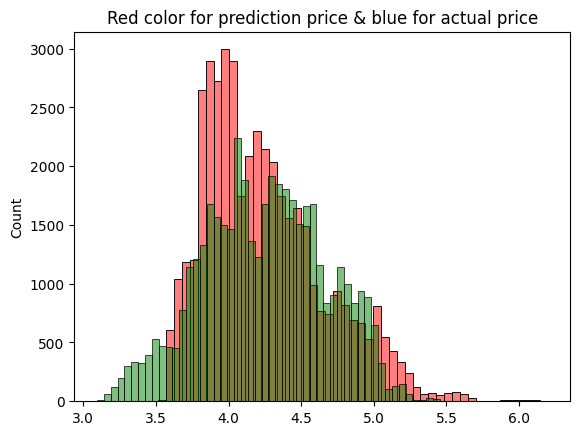

In [49]:
sns.histplot(y_train_pred ,color='red',alpha=0.5 ,bins=50)
sns.histplot(y_train ,color='green',alpha=0.5, bins=50)
plt.title("Red color for prediction price & blue for actual price")


#RMSE

In [50]:
def rmse(y,y_train):
  error = y - y_train
  se = error**2
  mse=se.mean()
  return np.sqrt(mse)

In [51]:
rmse(y_train_pred,y_train)

0.10434835361248357

#Validation

In [52]:
y_val_pred=w0+X_val.dot(w1)

Text(0.5, 1.0, 'Red color for prediction price & blue for actual price')

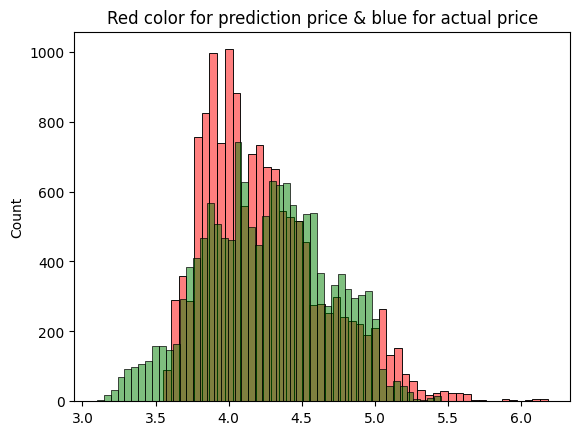

In [53]:
sns.histplot(y_val_pred ,color='red',alpha=0.5 ,bins=50)
sns.histplot(y_val ,color='green',alpha=0.5, bins=50)
plt.title("Red color for prediction price & blue for actual price")

In [54]:
rmse(y_val_pred,y_val)

0.10429471108057638

#Regularization

In [71]:
def linear_regression(X,y,r=0.01):
  ones=np.ones(X.shape[0])
  X=np.column_stack([ones,X])
  XTX=X.T.dot(X)
  XTX=XTX+r*np.eye(XTX.shape[0])
  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv.dot(X.T).dot(y)
  return w_full[0],w_full[1:]

In [72]:
w0,w1=linear_regression(X_train,y_train)
y_train_pred=w0+X_train.dot(w1)
rmse(y_train_pred,y_train)

0.10434835363676977

#Building Final Model & Testing

In [73]:
X_full_train=prepare(df_full_train)

In [75]:
y_full_train=np.log1p(df_full_train['close'].values)

In [76]:
w0,w1=linear_regression(X_full_train,y_full_train)
y_full_train_pred=w0+X_full_train.dot(w1)
rmse(y_full_train_pred,y_full_train)

0.10432586913986347

In [78]:
y_test_pred=w0 + prepare(df_test).dot(w1)
rmse(y_test,y_test_pred)

0.10590152669068617

#Using the model

In [84]:
close_price = df_test.iloc[20].to_dict()
small_df=pd.DataFrame([close_price])
X=prepare(small_df)
y=w0+X.dot(w1)
y=y[0]
predicted_price=np.expm1(y)
actual_price=np.expm1(y_test[20])

In [85]:
print('Predicted price is:',predicted_price)
print('Actual price  is:',actual_price)

Predicted price is: 73.22788745526454
Actual price  is: 80.74240000000003
